In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nilearn

In [37]:
# Importing Dataset

from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure

data = fetch_abide_pcp(derivatives=['rois_ez'], SITE_ID=['NYU']) # Extracting fMRI data from NYU repository wrt AAL atlas

In [38]:
# Pre-processing the data

conn_est = ConnectivityMeasure(kind='correlation') # Connectivity Estimator
conn_matrices = conn_est.fit_transform(data['rois_ez'])
print(conn_matrices)

[[[ 1.          0.80014476  0.58541318 ...  0.18578668 -0.18738462
    0.26572693]
  [ 0.80014476  1.          0.54246713 ...  0.07589244 -0.25321172
    0.25259437]
  [ 0.58541318  0.54246713  1.         ...  0.11415482 -0.10421222
    0.21710683]
  ...
  [ 0.18578668  0.07589244  0.11415482 ...  1.          0.33701258
    0.31732641]
  [-0.18738462 -0.25321172 -0.10421222 ...  0.33701258  1.
    0.43056376]
  [ 0.26572693  0.25259437  0.21710683 ...  0.31732641  0.43056376
    1.        ]]

 [[ 1.          0.57455068  0.44941794 ...  0.28346314  0.08291007
    0.11386753]
  [ 0.57455068  1.          0.3059987  ...  0.23179046 -0.0196578
    0.08384825]
  [ 0.44941794  0.3059987   1.         ...  0.2981234   0.10380297
    0.08504967]
  ...
  [ 0.28346314  0.23179046  0.2981234  ...  1.          0.29873554
    0.2755398 ]
  [ 0.08291007 -0.0196578   0.10380297 ...  0.29873554  1.
    0.27773269]
  [ 0.11386753  0.08384825  0.08504967 ...  0.2755398   0.27773269
    1.        ]]

 [[ 1

<Axes: >

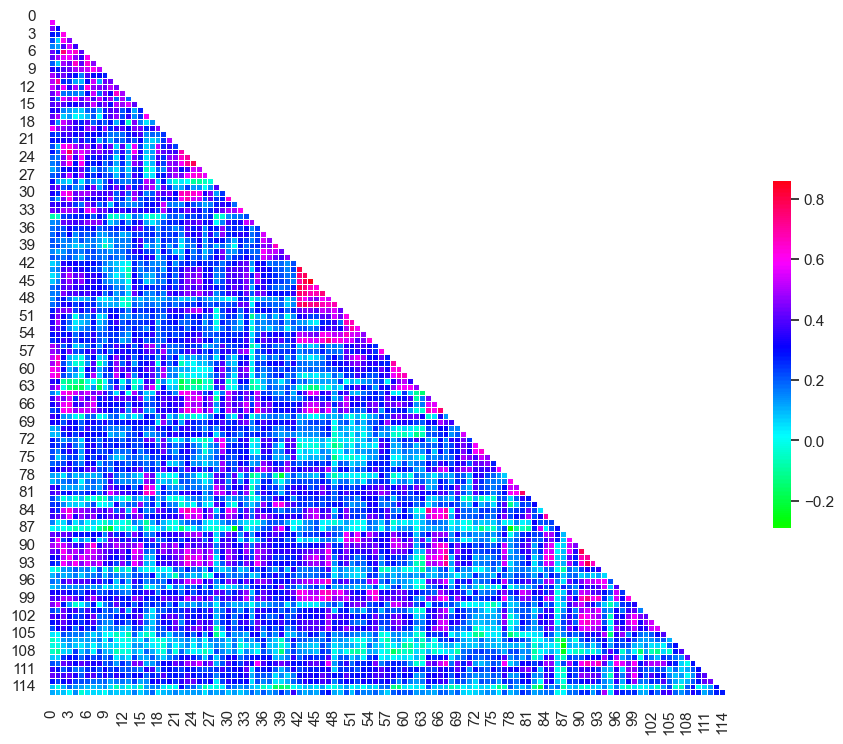

In [39]:
import seaborn as sns

corr = conn_matrices[1]
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='hsv', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
# shape of input

print(conn_matrices.shape)

(172, 116, 116)


In [41]:
# conn_matrices is a matrix that contains the correlation of different ROIs for each sample
# conn_matrices[i][j][k] -> correlation between ROI j and ROI k for subject i

# It is to note that connectivity matrices are symmetric matrices. Let flatten this matrix into a vector

sym_vec_matrices = [conn_matrix[np.triu_indices_from(conn_matrix, k=1)] for conn_matrix in conn_matrices]# Converting sym. matrix into vector
X=sym_vec_matrices
#print(X.shape)

In [42]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [43]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = y.reshape(y.shape[0], 1)
y = ohe.fit_transform(y).toarray()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Neural network
model = Sequential()
#model.add(Dropout(0.8))

# Hidden Layer 1
model.add(Dense(64, input_dim=6670, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with dropout rate of 0.8

# Hidden Layer 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) # Dropout layer with dropout rate of 0.8


# Output Layer
model.add(Dense(2, activation='sigmoid'))  # Use sigmoid activation for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [47]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 1.7042 - accuracy: 0.5985
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 1.9047 - accuracy: 0.5766
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 2.0286 - accuracy: 0.6423
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 1.3760 - accuracy: 0.7080
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 1.3589 - accuracy: 0.7153
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 1.4517 - accuracy: 0.7518
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 1.5133 - accuracy: 0.7372
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 1.3302 - accuracy: 0.7591
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9464 - accuracy: 0.8029
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7245 - accuracy: 0.8686
Epoch 11/

14/14 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.9927
Epoch 84/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 85/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9927
Epoch 86/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.9854
Epoch 87/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0392 - accuracy: 0.9927
Epoch 88/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9927
Epoch 89/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1107 - accuracy: 0.9854
Epoch 90/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0617 - accuracy: 0.9854
Epoch 91/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.9927
Epoch 92/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0490 - accuracy: 0.9927
Epoch 93/100


In [48]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print(pred)
print(test)

2/2 [==============================] - 0s 3ms/step
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [49]:
from sklearn.metrics import accuracy_score,classification_report
a = accuracy_score(pred,test)
print('Calssification report',classification_report(pred,test))
print('Accuracy is:', a*100)

Calssification report               precision    recall  f1-score   support

           0       0.50      0.47      0.48        15
           1       0.62      0.65      0.63        20

    accuracy                           0.57        35
   macro avg       0.56      0.56      0.56        35
weighted avg       0.57      0.57      0.57        35

Accuracy is: 57.14285714285714


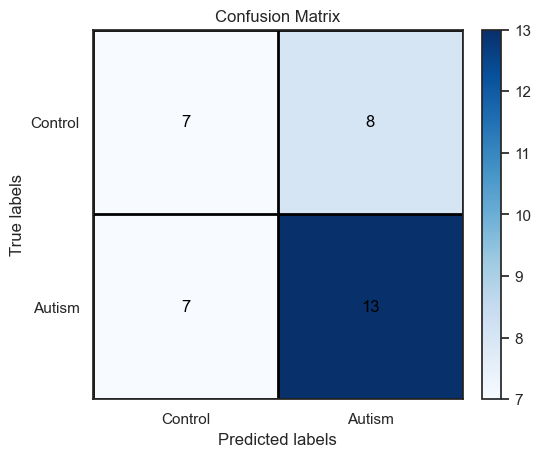

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming pred and test are your predicted and true labels

conf_matrix = confusion_matrix(pred, test)

fig, ax = plt.subplots()

# Plot the heatmap
im = ax.imshow(conf_matrix, cmap='Blues')

# Add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, f'{conf_matrix[i, j]}', ha='center', va='center', color='black', fontsize=12)

# Customize xticks and yticks
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))
ax.set_xticklabels(['Control', 'Autism'])
ax.set_yticklabels(['Control', 'Autism'])

# Add grid lines
ax.set_xticks(np.arange(conf_matrix.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(conf_matrix.shape[0] + 1) - 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [51]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [52]:
y[y == 2] = -1
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [53]:
from sklearn import svm
from sklearn.model_selection import cross_validate

# Now, as there are various hyperparameters associated with SVM, we will tune it to 
# see which configuration gives the best result

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

C = []
gamma = []

for i in range(-5, 16):
    C.append(2**i)

for i in range(-15, 4):
    gamma.append(2**i)

In [54]:
# Let's start with linear kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='linear', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.000061,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.000122,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.000244,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.000488,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.000977,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.001953,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.003906,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.007812,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941
0.015625,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,...,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941,0.592941


In [55]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [66]:
def Plot3D(df, title):
    X = []
    Y = []
    Z = []
    for i in range(-5, 16):
        for j in range(-15, 4):
            x = 2 ** i
            y = 2 ** j
            z = df[x][y]
            X.append(i)
            Y.append(j)
            Z.append(z)
    newdf = pd.DataFrame({'x': X, 'y': Y, 'z': Z}, index=range(len(X)))
    fig = plt.figure(dpi=150,figsize=(10,8))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('C (in log scale)')
    ax.set_ylabel('Gamma (in log scale)')
    ax.set_zlabel('Accuracy observed',labelpad=0)
    ax.set_title(title)
    ax.plot_trisurf(newdf.x, newdf.y, newdf.z, cmap=cm.cividis, linewidth=0.2)
    plt.show()


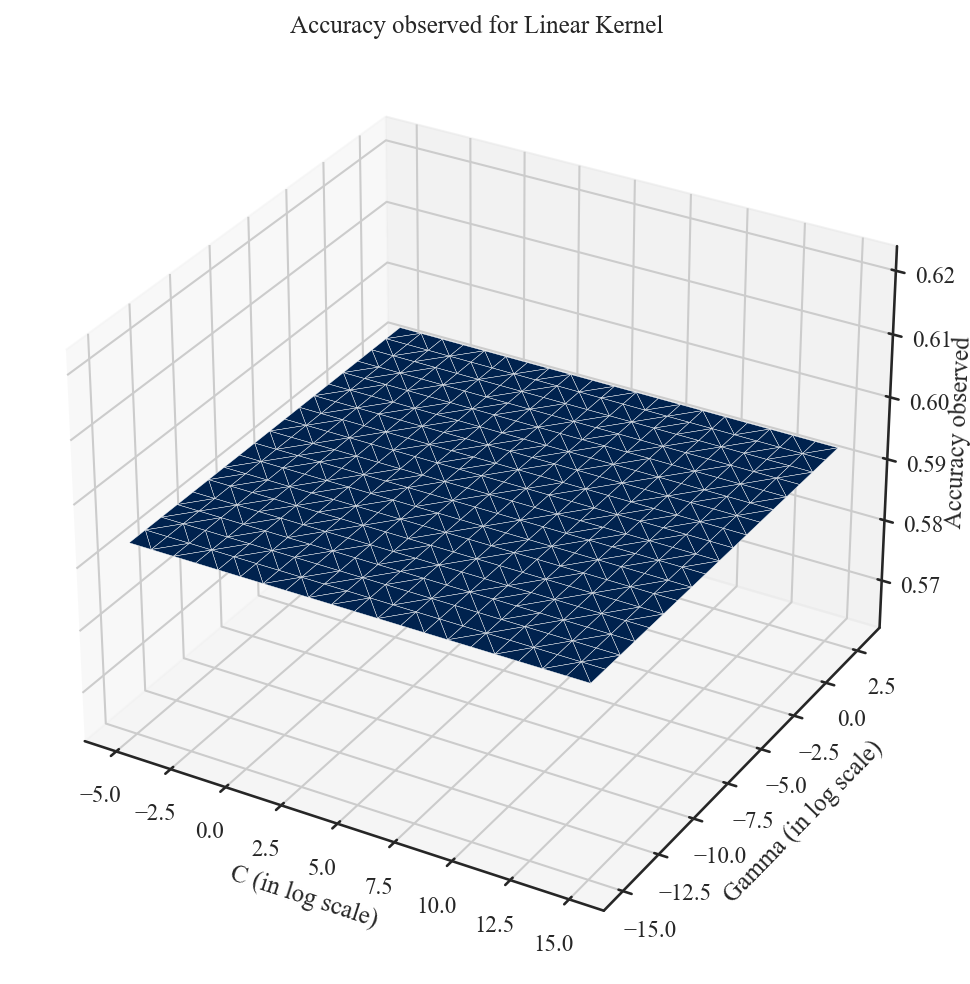

In [67]:
Plot3D(df, 'Accuracy observed for Linear Kernel')

In [27]:
# Using radial kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='rbf', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.500840,0.500840,0.500840,0.500840,0.512437,0.570084,0.575966,0.615966,0.604874,0.628403,...,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403
0.000061,0.477311,0.477311,0.477311,0.466050,0.540672,0.575966,0.604202,0.622353,0.616639,0.616639,...,0.616639,0.616639,0.616639,0.616639,0.616639,0.616639,0.616639,0.616639,0.616639,0.616639
0.000122,0.494958,0.494958,0.494958,0.483529,0.553109,0.587227,0.627899,0.628067,0.628067,0.628067,...,0.628067,0.628067,0.628067,0.628067,0.628067,0.628067,0.628067,0.628067,0.628067,0.628067
0.000244,0.542017,0.542017,0.494958,0.465546,0.471429,0.627395,0.627395,0.627395,0.627395,0.627395,...,0.627395,0.627395,0.627395,0.627395,0.627395,0.627395,0.627395,0.627395,0.627395,0.627395
0.000488,0.489076,0.465546,0.465546,0.465546,0.465546,0.575630,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.000977,0.512605,0.512605,0.489076,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.001953,0.489076,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.003906,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.007812,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.015625,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748


In [28]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.478549,0.476073,0.472357,0.468377,0.476886,0.574356,0.578284,0.581353,0.580469,0.581707,...,0.581707,0.581707,0.581707,0.581707,0.581707,0.581707,0.581707,0.581707,0.581707,0.581707
std,0.021352,0.021352,0.012442,0.008873,0.026979,0.013537,0.019118,0.022486,0.021089,0.023188,...,0.023188,0.023188,0.023188,0.023188,0.023188,0.023188,0.023188,0.023188,0.023188,0.023188
min,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
25%,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
50%,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
75%,0.489076,0.471429,0.471429,0.465546,0.465546,0.569916,0.572605,0.572605,0.572605,0.572605,...,0.572605,0.572605,0.572605,0.572605,0.572605,0.572605,0.572605,0.572605,0.572605,0.572605
max,0.542017,0.542017,0.500840,0.500840,0.553109,0.627395,0.627899,0.628067,0.628067,0.628403,...,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403,0.628403


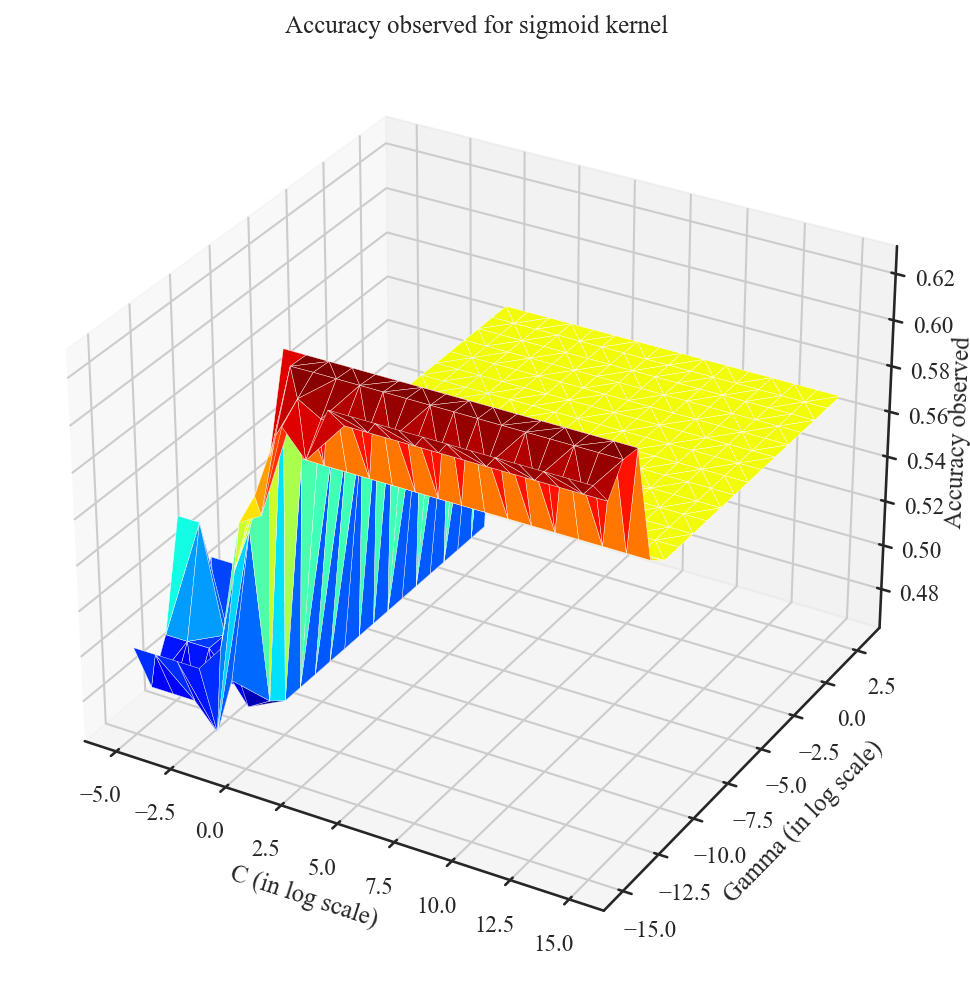

In [29]:
Plot3D(df, 'Accuracy observed for sigmoid kernel')

In [30]:
# Using quadratic kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='poly', degree=2, gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.465546,0.465546,0.465546,0.465546,0.465546,0.489076,0.581008,0.587059,0.524034,0.570252,...,0.581176,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.000061,0.465546,0.465546,0.465546,0.489076,0.581008,0.587059,0.524034,0.570252,0.575294,0.581176,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.000122,0.465546,0.489076,0.581008,0.587059,0.524034,0.570252,0.575294,0.581176,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.000244,0.581008,0.587059,0.524034,0.570252,0.575294,0.581176,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.000488,0.524034,0.570252,0.575294,0.581176,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.000977,0.575294,0.581176,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.001953,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.003906,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.007812,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.015625,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462


In [31]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01
mean,0.555683,0.559982,0.561468,0.565767,0.567253,0.571552,0.573038,0.576099,0.572747,0.575489,...,0.575763,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01
std,0.041825,0.038921,0.035838,0.031581,0.027363,0.020230,0.011935,0.003219,0.011796,0.001822,...,0.001311,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16
min,0.465546,0.465546,0.465546,0.465546,0.465546,0.489076,0.524034,0.570252,0.524034,0.570252,...,0.575462,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01
25%,0.575378,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01
50%,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01
75%,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01
max,0.581008,0.587059,0.581008,0.587059,0.581008,0.587059,0.581008,0.587059,0.575462,0.581176,...,0.581176,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01,5.754622e-01


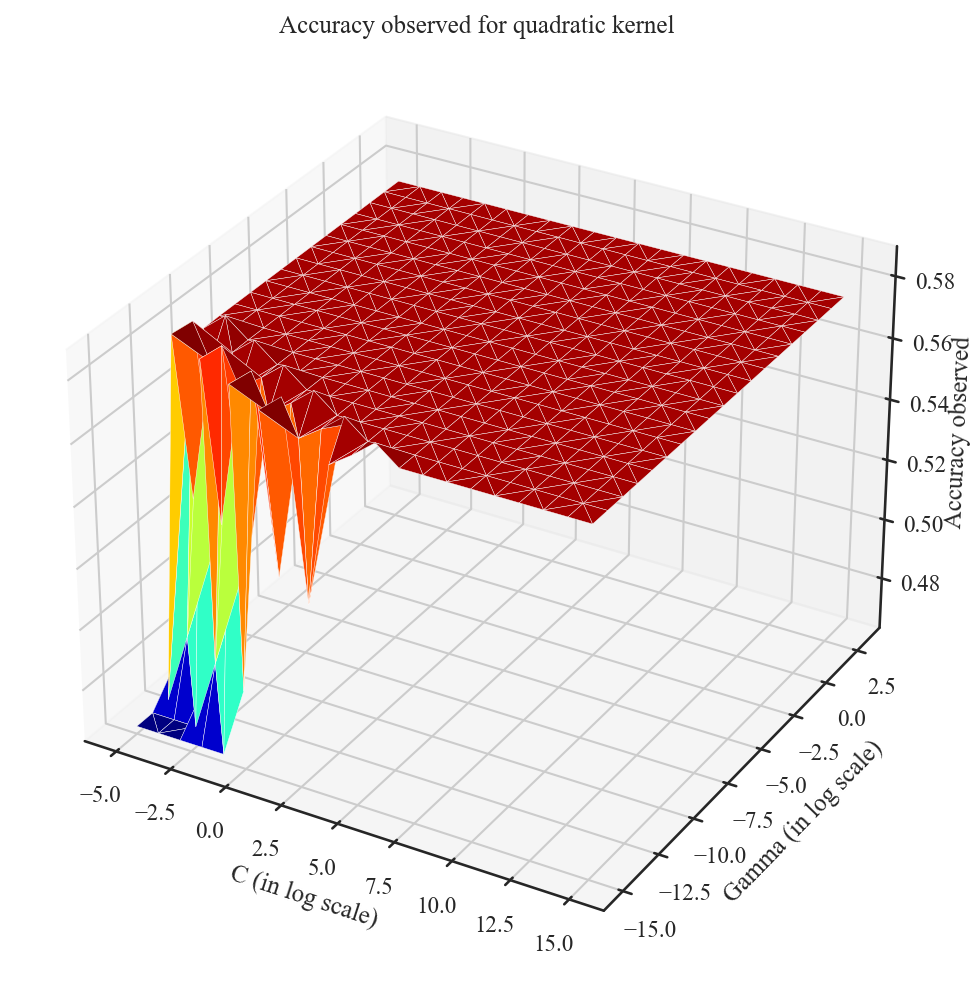

In [32]:
Plot3D(df, 'Accuracy observed for quadratic kernel')